In [9]:
from sklearn.ensemble import GradientBoostingRegressor

import pandas as pd
import numpy as np
import vset, bounds
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from dgp import *
import estimation, utils, experiments, plots, realdata, plots, os

os.mkdir('results')

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

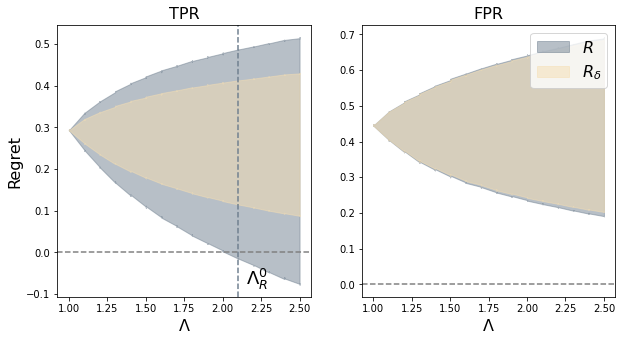

In [2]:
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)

dgp = {
    'N': 10000,
    'Dx': data['XU'].shape[1],
    'Du': 0,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'lambda': 2,
    'model': 'LR'
}

lambdas = np.arange(1, 2.6, .1)
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)
estimation.sample_split_crossfit(dgp, data, id_method='MSM', est_method='plugin', K=5)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)


## Utility ratio curve

{'N': 10000, 'Dx': 11, 'Du': 0, 'nz': 10, 'beta_zy': 0, 'e1_coeffs': array([ 1.4361478 ,  0.37140015,  1.96803763,  0.5615629 ,  0.01978339,
       -0.58685787,  0.83846469, -1.16451117,  0.41849409, -1.37357356,
       -1.32229809]), 'z_coeffs': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mu1_coeffs': array([ 0.7140368 ,  1.53017848,  0.24606583,  1.1684481 ,  2.89742956,
        0.43647071,  2.9672593 ,  0.63677325,  1.73023524, -0.85418848,
        0.73059474]), 'mu0_coeffs': array([ 0.98521405, -1.30121642,  0.65513318, -0.35992461,  0.05363845,
       -0.90858942,  1.30024369, -1.60575458, -0.56364232,  1.22047236,
       -1.2147609 ]), 'lambda': 1.7, 'model': 'LR', 'id_assumption': 'MSM', 'lambda_star': 1.073509899286912, 'beta_zd': 0}


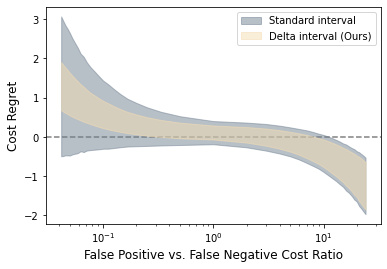

In [18]:
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=2000)

nD =  data['XU'].shape[1]
dgp = {
    'N': 10000,
    'Dx': nD,
    'Du': 0,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.4,
    'model': 'LR'
}
dgp = set_dgp_config(dgp, 'MSM')
crdf = experiments.cost_ratio_sweep_exp(dgp, data, lam=1.7)
crdf.to_csv('results/ratio_curve_df.csv', index=False)

plots.plot_cost_ratio_curve(dgp, crdf, 'results/ratio_curve_df.pdf')

## Evaluating the subgroup regret

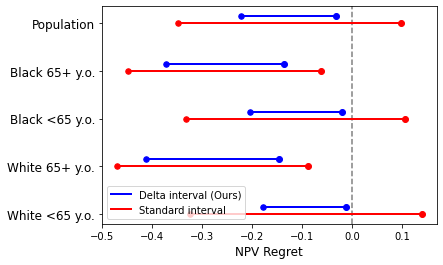

In [10]:
Dx, Du = 5, 0
nD = Dx+Du
n_screen_out = 2000
data = realdata.get_screening_dgp(fname='data/obermeyer.csv', n_screen_out=n_screen_out)

dgp = {
    'Dx': data['XU'].shape[1],
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    'lambda': 1.2,
    'model': 'LR'
}
n_screen_out=2000
gbdf = realdata.subgroup_exp(data, dgp, n_sims=20, K=2, n_screen_out=n_screen_out)
gbdf.to_csv('results/subgroup_exp_df.csv', index=False)
plots.plot_subgroup_basic(gbdf, metric='m_a=0', fname='figs/subgroup_regret.pdf')